### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### Выбор и преобразование данных

In [2]:
auto_data = pd.read_csv("audi.csv")
# Преобразуем номинальные величины в значения от 0 до n-1
object_cols = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in object_cols:
    auto_data[col] = le.fit_transform(auto_data[col])
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145,49.6,1.0
10664,2,2020,16999,1,1978,2,150,49.6,1.0
10665,2,2020,17199,1,609,2,150,49.6,1.0
10666,9,2017,19499,0,8646,2,150,47.9,1.4


In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  int32  
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  int32  
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  int32  
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 625.2 KB


In [4]:
# Разделим данные на признаки и ответы
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

### Разделить данные на тестовые и тренировочные

In [5]:
# Разделим данные на тестовые и тренировочные
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [6]:
# Стандартизируем данные
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[-0.54832954, -0.50864112, -0.11396454, ..., -1.88095873,
         1.82427663,  0.11573486],
       [ 0.99112684,  1.33170933,  1.19926576, ...,  0.27244894,
        -1.34731756,  1.77540872],
       [-0.74076159,  0.87162172, -0.11396454, ...,  0.27244894,
         0.05713534, -0.54813469],
       ...,
       [-0.74076159,  0.87162172, -0.11396454, ...,  0.27244894,
         0.36580631,  0.11573486],
       [ 3.68517552, -0.04855351,  1.19926576, ...,  0.34670437,
        -0.60650724,  0.11573486],
       [-0.54832954, -0.50864112,  1.19926576, ..., -1.58393698,
         1.28410244,  0.11573486]])

### Попытаться обучить регрессии c лучшим качеством
#### Линейная регрессия

In [13]:
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)
# Строим предсказание
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_predictions

array([28387.009695  , 14423.28789885, 29814.20546421, ...,
       26065.70732181, 44142.22256319, 26373.59334903])

In [8]:
# Посчитаем среднеквадратичную ошибку
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 5215.371


Text(0, 0.5, 'Target')

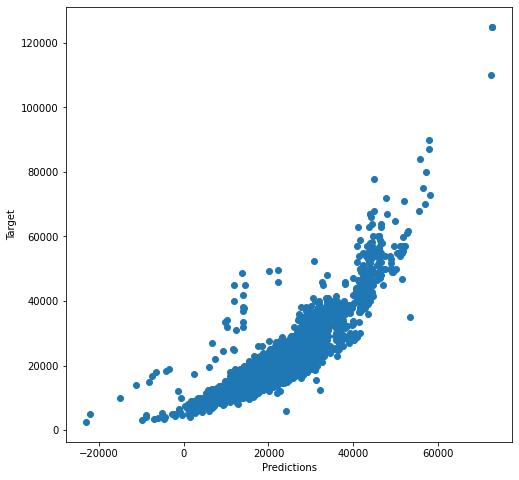

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [15]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1380.643349
price,4685.844468
transmission,-129.141361
mileage,-2239.015798
fuelType,597.574476
tax,-1223.865100
mpg,-2028.518507
engineSize,6796.366525


#### Lasso

In [18]:
model = Lasso()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5215.21


#### LassoCV

In [26]:
model = LassoCV(random_state=10)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5214.274


In [29]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [31]:
model = LassoCV(random_state = 10, alphas=alphas)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5214.331


#### Ridge

In [20]:
model = Ridge()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5215.231


#### RidgeCV

In [21]:
model = RidgeCV()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5213.988


#### Лес

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')
pd.DataFrame(model.feature_importances_, auto_data.columns[1:], 
             columns=['Importance']).sort_values('Importance')

RMSE = 2274.573


,Importance
transmission,0.005310
fuelType,0.006196
tax,0.033410
mileage,0.051023
year,0.058530
engineSize,0.185657
price,0.221071
mpg,0.438803


Text(0, 0.5, 'Target')

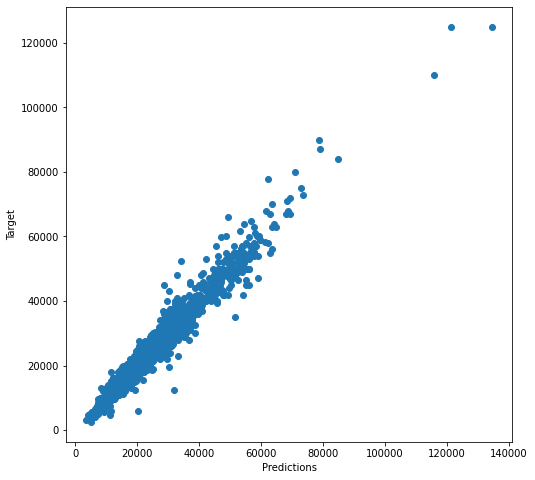

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')